In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:
def sir_model(t, y, beta, gamma):
    """
    t: time
    y: a vector of [S, I, R]
    beta: transmission rate
    gamma: recovery rate
    """
    S, I, R = y
    
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    
    return [dSdt, dIdt, dRdt]

In [10]:
S0 = 999.0  # Initial susceptible
I0 = 1.0    # Initial infected
R0 = 0.0    # Initial recovered
y0 = [S0, I0, R0]  # Initial state 

# Parameters
beta = 0.0003  # Transmission rate 
gamma = 0.1    # Recovery rate

# Time span
t_span = [0, 150]  # 150 days

# Generate points in time to evaluate the solution for a smooth plot
t_eval = np.linspace(t_span[0], t_span[1], 1000) 

# Run the solver
sol = solve_ivp(sir_model, t_span, y0, args=(beta, gamma), t_eval=t_eval) #smooth
sol_ns = solve_ivp(sir_model, t_span, y0, args=(beta, gamma))  #no smooth

Simulation complete. Plot saved as 'sir_model_simulation.png'.
Initial conditions: S0=999, I0=1, R0=0
Parameters: beta=0.0003, gamma=0.1
Peak infection: 300.74 individuals.
Time of peak infection: 38.29 days.


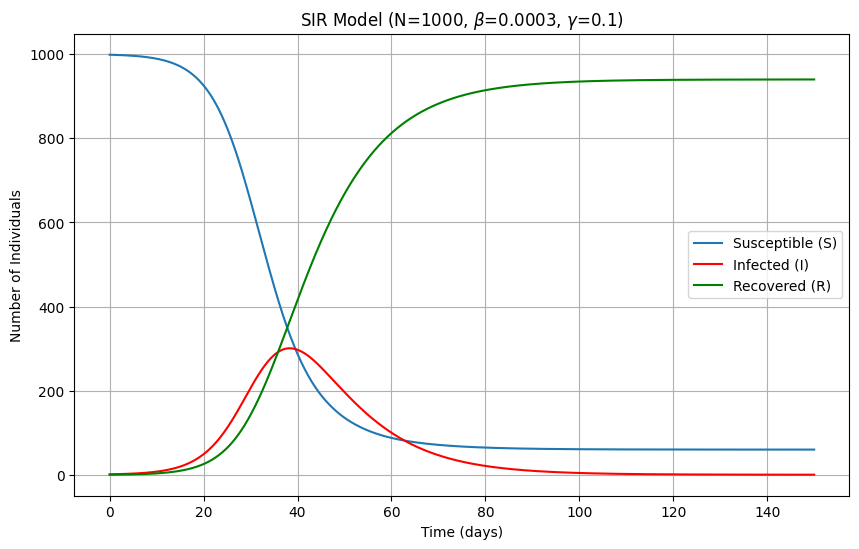

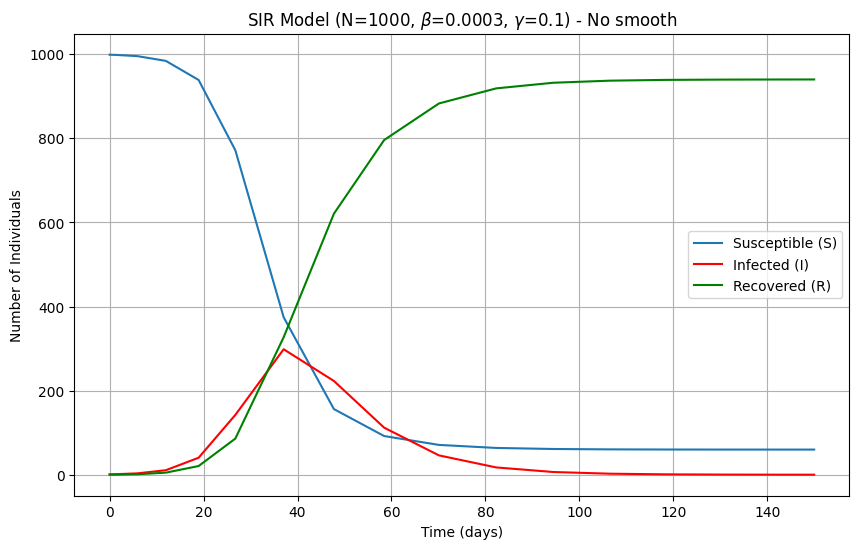

In [12]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Susceptible (S)')
plt.plot(sol.t, sol.y[1], label='Infected (I)', color='red')
plt.plot(sol.t, sol.y[2], label='Recovered (R)', color='green')
plt.xlabel('Time (days)')
plt.ylabel('Number of Individuals')
plt.title(f'SIR Model (N=1000, $\\beta$={beta}, $\\gamma$={gamma})')
plt.legend()
plt.grid(True)
plt.savefig('sir_model_simulation.png', dpi=300)

# Calculate and print peak infection
peak_infection_count = np.max(sol.y[1])
peak_infection_time = sol.t[np.argmax(sol.y[1])]

print(f"Simulation complete. Plot saved as 'sir_model_simulation.png'.")
print(f"Initial conditions: S0=999, I0=1, R0=0")
print(f"Parameters: beta={beta}, gamma={gamma}")
print(f"Peak infection: {peak_infection_count:.2f} individuals.")
print(f"Time of peak infection: {peak_infection_time:.2f} days.")


# Plot NO smooth
plt.figure(figsize=(10, 6))
plt.plot(sol_ns.t, sol_ns.y[0], label='Susceptible (S)')
plt.plot(sol_ns.t, sol_ns.y[1], label='Infected (I)', color='red')
plt.plot(sol_ns.t, sol_ns.y[2], label='Recovered (R)', color='green')
plt.xlabel('Time (days)')
plt.ylabel('Number of Individuals')
plt.title(f'SIR Model (N=1000, $\\beta$={beta}, $\\gamma$={gamma}) - No smooth')
plt.legend()
plt.grid(True)

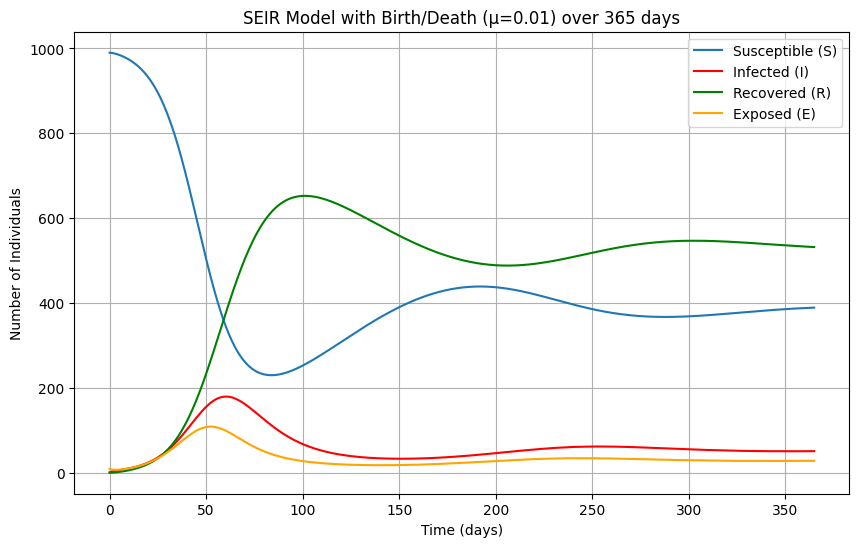

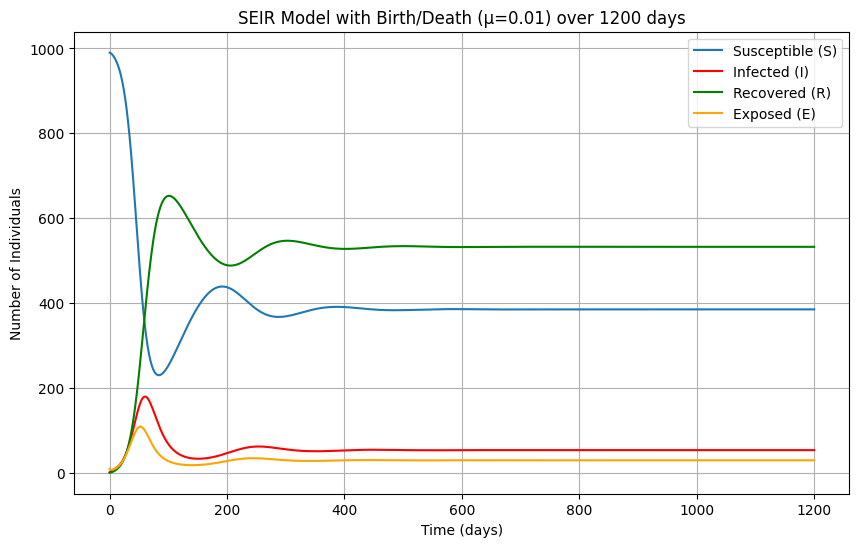

In [23]:
def seir_model(t, y, N, beta, gamma, mu, sigma):
    """
    t: time
    y: a vector of [S, I, R]
    beta: transmission rate
    gamma: recovery rate
    """
    S, I, R, E = y
    
    dSdt = mu*N -beta * S * I -mu*S
    dEdt = beta*S*I - (sigma+mu)*E
    dIdt = sigma*E -(gamma+mu)* I 
    dRdt = gamma * I - mu * R
    
    return [dSdt, dIdt, dRdt, dEdt]

S0 = 990
E0 = 9
I0 = 1
R0 = 0
N=1000
y0 = [S0, I0, R0, E0]  # Initial state 

# Parameters
beta = 0.0003  # Transmission rate 
gamma = 0.1    # Recovery rate
sigma=0.2
mu=0.01

# Plot the results
def plotdays(days):

    t_span = [0, days] 
    t_eval = np.linspace(t_span[0], t_span[1], 1000) 

    sol = solve_ivp(seir_model, t_span, y0, args=(1000, beta, gamma, mu, sigma), t_eval=t_eval)
    
    plt.figure(figsize=(10, 6))
    plt.plot(sol.t, sol.y[0], label='Susceptible (S)')
    plt.plot(sol.t, sol.y[1], label='Infected (I)', color='red')
    plt.plot(sol.t, sol.y[2], label='Recovered (R)', color='green')
    plt.plot(sol.t, sol.y[3], label='Exposed (E)', color='orange')
    plt.xlabel('Time (days)')
    plt.ylabel('Number of Individuals')
    plt.title(f'SEIR Model with Birth/Death (μ=0.01) over {days} days')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'seir_model_simulation_{days}.png', dpi=300)
    plt.show()
    
plotdays(365)
plotdays(1200)

In [ ]:
## sensitive analysis

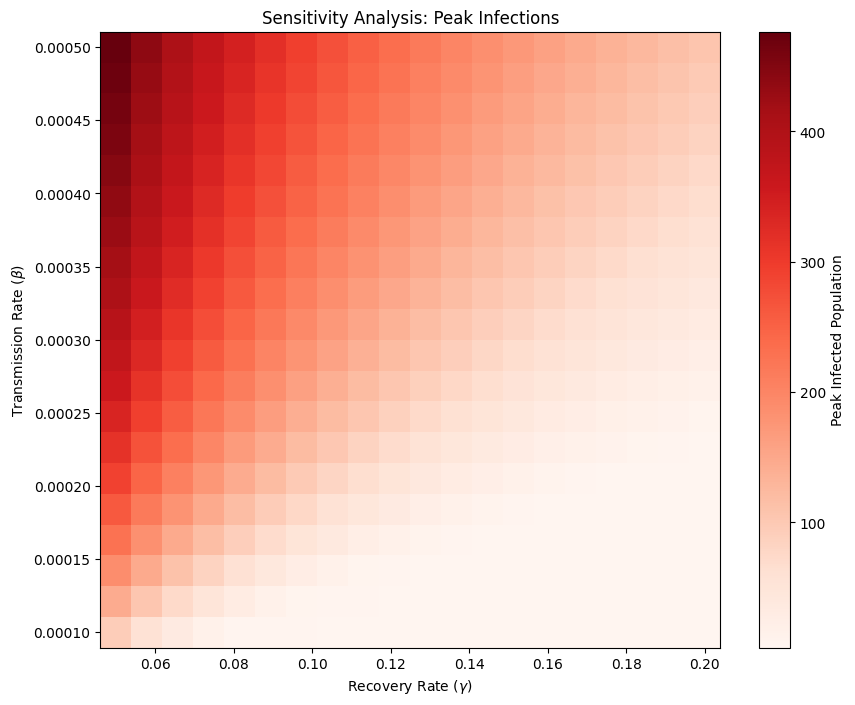

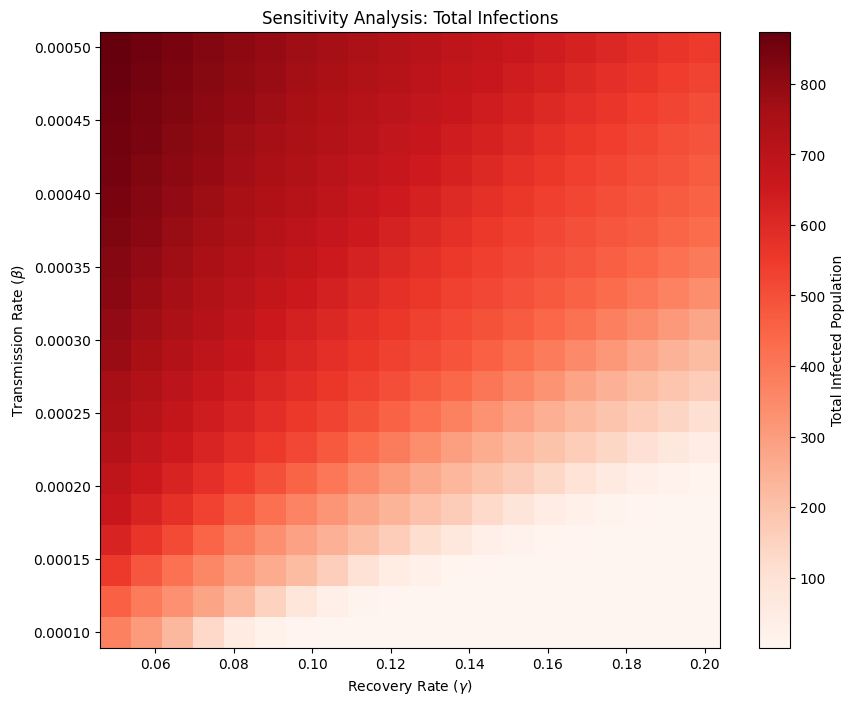

In [30]:
def seir_model(t, y, N, beta, gamma, mu, sigma):
    """
    t: time
    y: a vector of [S, I, R]
    beta: transmission rate
    gamma: recovery rate
    """
    S, I, R, E = y
    
    dSdt = mu*N -beta * S * I -mu*S
    dEdt = beta*S*I - (sigma+mu)*E
    dIdt = sigma*E -(gamma+mu)* I 
    dRdt = gamma * I - mu * R
    
    return [dSdt, dIdt, dRdt, dEdt]

S0 = 990
E0 = 9
I0 = 1
R0 = 0
N=1000
y0 = [S0, I0, R0, E0]  # Initial state 

# Parameters
beta_range = np.linspace(0.0001, 0.0005, 20)
gamma_range = np.linspace(0.05, 0.20, 20)
sigma=0.2
mu=0.01

peak_infections = np.zeros((len(beta_range), len(gamma_range)))
total_infections = np.zeros((len(beta_range), len(gamma_range)))

t_span = [0, 365] 
t_eval = np.linspace(t_span[0], t_span[1], 1000) 

for i, beta in enumerate(beta_range):
    for j, gamma in enumerate(gamma_range):
        sol = solve_ivp(seir_model, t_span, y0, args=(N, beta, gamma, mu, sigma), t_eval=t_eval)
        
        #the peak of the 'I' curve (sol.y[1])
        peak = np.max(sol.y[1])
        peak_infections[i, j] = peak

        s_final = sol.y[0][-1]
        total_infections[i, j] = N-s_final

plt.figure(figsize=(10, 8))
# Use pcolormesh or imshow. Transpose the result to get beta on the y-axis.
plt.pcolormesh(gamma_range, beta_range, peak_infections, shading='auto', cmap='Reds')

plt.colorbar(label='Peak Infected Population')
plt.xlabel('Recovery Rate ($\gamma$)')
plt.ylabel('Transmission Rate ($\\beta$)')
plt.title('Sensitivity Analysis: Peak Infections')
plt.show()

plt.figure(figsize=(10, 8))
# Use pcolormesh or imshow. Transpose the result to get beta on the y-axis.
plt.pcolormesh(gamma_range, beta_range, total_infections, shading='auto', cmap='Reds')

plt.colorbar(label='Total Infected Population')
plt.xlabel('Recovery Rate ($\gamma$)')
plt.ylabel('Transmission Rate ($\\beta$)')
plt.title('Sensitivity Analysis: Total Infections')
plt.show()
